# Research Question:
**How does Brand origin (Local vs. Foreign) influence predicted car resale price when mileage and age are considered?**


Target: Resale price
- Since price directly reflect vehicle value depreciation

Type: Supervised Learning
- Since the goal is to predict resale price

Core Features:
- Price - target
- Car Age - correlates with price (-0.55)
- Mileage - correlates with price (0.41)
- Brand Origin (Local=0, Foreign=1)
- Gear type (Manual=0, Automatic = 1)


*Since correlation between Year and Car_Age is -1, drop year to avoid confusing the model.


*The dataset has 31 Makes and 198 Modles, but since research question is about general trend of "Loca vs. Foreign", ML algorithm should memorize brand origin instead of makes and modles. So exclude these two variables to force the model to generalize based on origin.

Interaction Terms:
- Mileage x Car Age
- Brand Origin x Mileage
- Brand Origin x Car Age

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_balanced_4000_final.csv')

In [ ]:
# Encode Brand Origin: Local=0, Foreign=1
df['Brand_Origin'] = df['Brand_Origin'].map({'Local': 0, 'Foreign': 1})

In [ ]:
# Encode Gear Type: Manual=0, Automatic=1
df['Gear_Type'] = df['Gear_Type'].map({'Manual': 0, 'Automatic': 1})

In [ ]:
# Drop unnecessary columns
df_ml = df.drop(columns=['Make', 'Model', 'Year'])

In [ ]:
# Create Interaction terms
# Mileage x Car Age
df_ml['Mileage_Age'] = df_ml['Mileage'] * df_ml['Car_Age']
# Brand Origin x Mileage
df_ml['Brand_Mileage'] = df_ml['Brand_Origin'] * df_ml['Mileage']
# Brand Origin x car Age
df_ml['Brand_Age'] = df_ml['Brand_Origin'] * df_ml['Car_Age']
# Check that features contains valid values
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          4000 non-null   int64
 1   Mileage        4000 non-null   int64
 2   Gear_Type      4000 non-null   int64
 3   Brand_Origin   4000 non-null   int64
 4   Car_Age        4000 non-null   int64
 5   Mileage_Age    4000 non-null   int64
 6   Brand_Mileage  4000 non-null   int64
 7   Brand_Age      4000 non-null   int64
dtypes: int64(8)
memory usage: 250.1 KB


In [ ]:
# Define x and y
y = df_ml['Price']
X = df_ml.drop(columns=['Price'])

In [ ]:
# Split the dataset into training(80%) and testing(20%) subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---



**Linear Regression**

- Since variables like mileage, car age, and interaction terms operate on different numerical ranges, feature scaling is used for common scale and further interpretation

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize scaler
scaler = StandardScaler()
# Fit scaler on training data and trandform
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predict resale price on test set
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
# OLS modle
import statsmodels.api as sm
# Define predictors for OLS
X_ols = df_ml[[
    'Mileage',
    'Car_Age',
    'Brand_Origin',
    'Gear_Type',
    'Mileage_Age',
    'Brand_Mileage',
    'Brand_Age'
]]
# Add constant (intercept)
X_ols = sm.add_constant(X_ols)
# Target variable
y_ols = df_ml['Price']
# Fit OLS model
ols_model = sm.OLS(y_ols, X_ols).fit()
# Print summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     708.6
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:28:07   Log-Likelihood:                -49385.
No. Observations:                4000   AIC:                         9.879e+04
Df Residuals:                    3992   BIC:                         9.884e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.99e+05   1.31e+04     15.204

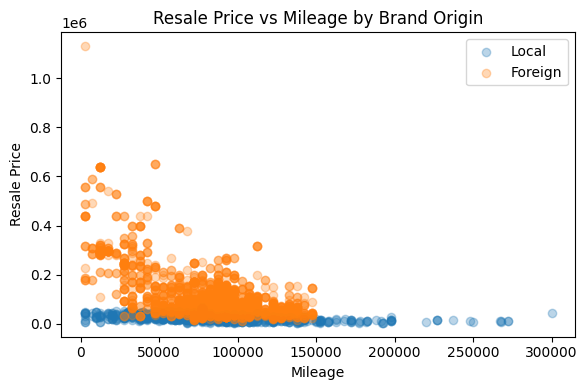

In [ ]:
# Scattered plot of price vs Mileage, colored by brand origin
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
for brand, label in [(0, 'Local'), (1, 'Foreign')]:
    subset = df_ml[df_ml['Brand_Origin'] == brand]
    plt.scatter(subset['Mileage'], subset['Price'], alpha=0.3, label=label)
plt.xlabel('Mileage')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Mileage by Brand Origin')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Testing the model
# Other than R², evaluation Metrics RMSE and MAE are used
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
# Calculate MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr, mae_lr

(np.float64(50700.195061904175), 29489.538950269904)

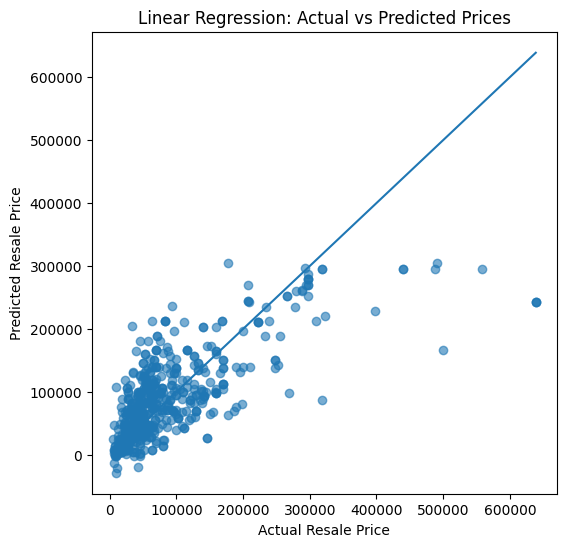

In [ ]:
# Scatter plot of actaul versus predicted resale prices
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()


The model has an R² of 0.554, which means the chosen variables account for over half of the variation in car resale price. However, the RMSE of 50,700 is quite high, likely because of the external factors not included in the dataset. However, the MAE of 29,489 shows that most of the prediction is off by a manageable amount, meaning the RMSE is inflated by outliers such as luxury foreign cars. Nevertheless, the linear regression provides a resonable baseline since in scattered plot of actual vs. predicted resale prices, most of the predictions follow the general trend.



---



**Decision Tree**
- Decision Tree Regressor is used for capture non-linear relationships and interaction effects that may not modeled by Linear Regression
- Since, fine-tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Initialize baseline Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
# Train model
dt_model.fit(X_train, y_train)
# Predict on test set
y_pred_dt = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
# Calculate MAE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
# Calculate R²
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt, mae_dt, r2_dt

(np.float64(38801.351021049646), 20876.364482509518, 0.7512914384709957)

The baseline Decision Tree model improved R² from 0.554 to 0.75, which means it captures 75% of the price trends. It also reduced RMSE by over 12,000 and MAE off by about 20,876. These proves that there exist non linear relationships between Mileage, brand origin, and price.

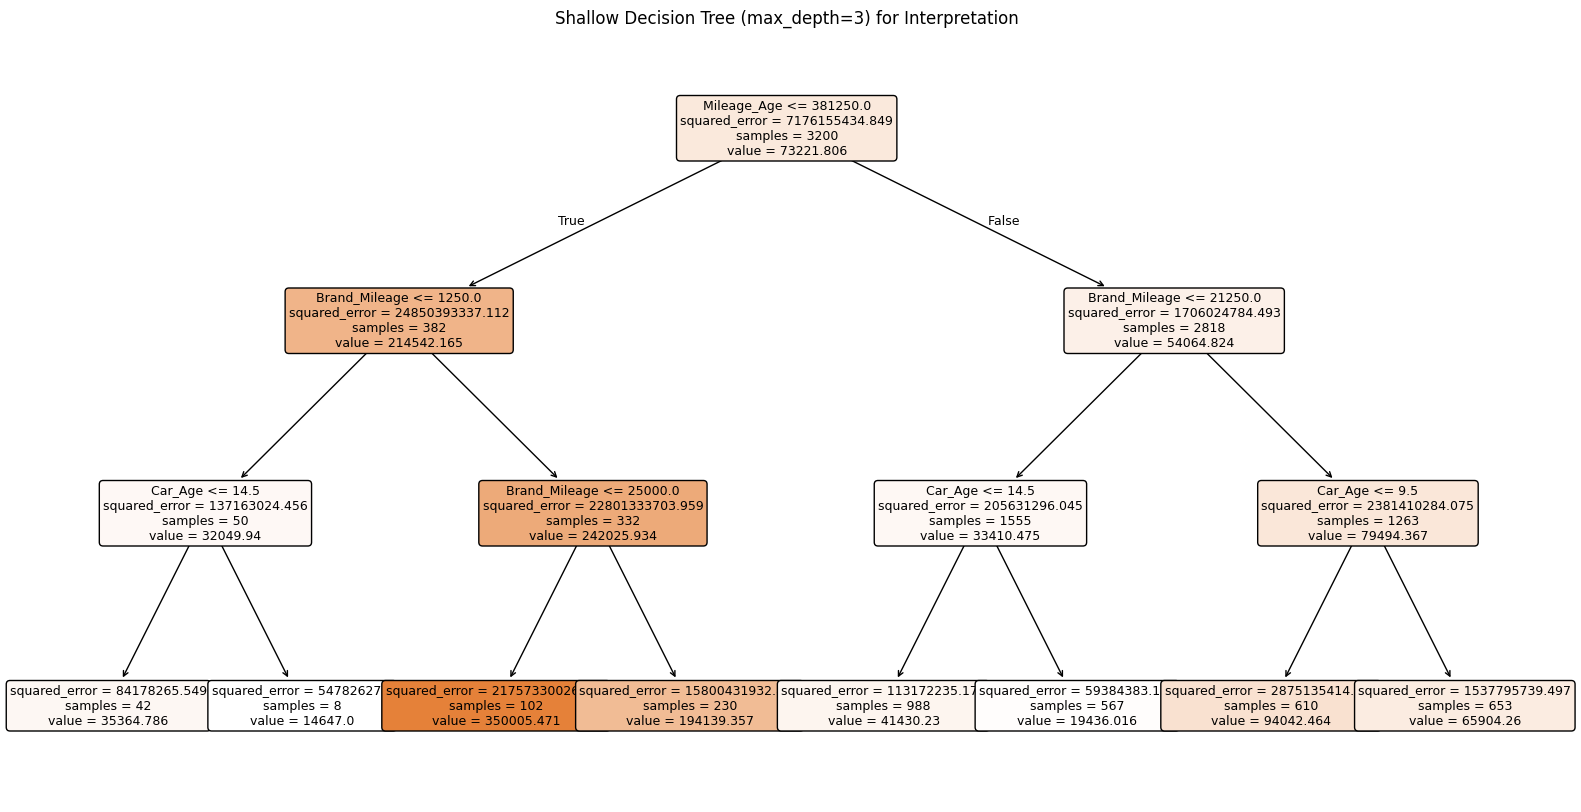

In [ ]:
# Create a shallow Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
dt_visual = DecisionTreeRegressor(max_depth=3, random_state=42
)
dt_visual.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_visual,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Shallow Decision Tree (max_depth=3) for Interpretation")
plt.show()

In [ ]:
# Tuned Decision Tree
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test)
rmse_dt_tuned = np.sqrt(mean_squared_error(y_test, y_pred_dt_tuned))
mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)
print("Tuned Decision Tree RMSE:", rmse_dt_tuned)
print("Tuned Decision Tree MAE:", mae_dt_tuned)
print("Tuned Decision Tree R²:", r2_dt_tuned)
print("Best parameters found:", grid_search.best_params_)

Tuned Decision Tree RMSE: 38801.351021049646
Tuned Decision Tree MAE: 20876.364482509518
Tuned Decision Tree R²: 0.7512914384709957
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


The metrics are the same before and after tune, this is likely becasue GridSearchCV slected the same modle as the origin decisiion tree since the origin one is already well-suited model rather than improving it. The main cause for this is that there are only three features that have strong relationship with the target variable. In such cases, the default model configuration may already provide optimal performance.



---



**Final Conclusion:**

The Linear Regression model provides reasonable performance, but it's prediction is limited on capturing unlinear and complex relationships. While the decision tree regressor are more effective, with only a small number of predictors, the default deicision tree was already well-suited to the dataset.